In [2]:
"""
항목 집합 ={i1, ..., in}=2의 n승 부분집합-1(공집합)
2의n승-1개 부분집합으로부터 연관규칙 생성(임계값 설정)
"""

'\n항목 집합 ={i1, ..., in}=2의 n승 부분집합-1(공집합)\n2의n승-1개 부분집합으로부터 연관규칙 생성(임계값 설정)\n'

In [8]:
import pandas as pd

In [9]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

#TransactionEncoder: 길이가 일정치 않은 거래 데이터를 머신러닝 하기에 적절한
#형태의 배열로 변환해주는 api

In [10]:
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'], 
           ['Apple', 'Beer', 'Rice'], 
           ['Apple', 'Beer'], 
           ['Apple', 'Bananas'], 
           ['Milk', 'Beer', 'Rice', 'Chicken'], 
           ['Milk', 'Beer', 'Rice'], 
           ['Milk', 'Beer'], 
           ['Apple', 'Bananas']]

In [11]:
te=TransactionEncoder()
te_array=te.fit(dataset).transform(dataset)
te_array

array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

In [12]:
te_array.astype(int)

array([[1, 0, 1, 1, 0, 1],
       [1, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1],
       [0, 0, 1, 0, 1, 1],
       [0, 0, 1, 0, 1, 0],
       [1, 1, 0, 0, 0, 0]])

In [13]:
te.columns_

['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice']

In [14]:
#te_array -> 데이터프레임변환, 컬럼 이름은 te.columns_ 설정
pd.DataFrame(te_array, columns=te.columns_)

,Apple,Bananas,Beer,Chicken,Milk,Rice
0,True,False,True,True,False,True
1,True,False,True,False,False,True
2,True,False,True,False,False,False
3,True,True,False,False,False,False
4,False,False,True,True,True,True
5,False,False,True,False,True,True
6,False,False,True,False,True,False
7,True,True,False,False,False,False


In [15]:
te_array

array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

In [16]:
te.inverse_transform(te_array)

[['Apple', 'Beer', 'Chicken', 'Rice'],
 ['Apple', 'Beer', 'Rice'],
 ['Apple', 'Beer'],
 ['Apple', 'Bananas'],
 ['Beer', 'Chicken', 'Milk', 'Rice'],
 ['Beer', 'Milk', 'Rice'],
 ['Beer', 'Milk'],
 ['Apple', 'Bananas']]

In [17]:
dataset=[['사과', '치즈', '생수'],
         ['생수', '딸기', '치즈', '고등어'],
         ['수박', '사과', '생수'],
         ['생수', '딸기', '치즈', '감자']
        ]

In [18]:
#데이터프레임으로 변환하시오
te=TransactionEncoder()
te_array=te.fit(dataset).transform(dataset)
te_array

array([[False, False, False,  True,  True, False,  True],
       [False,  True,  True, False,  True, False,  True],
       [False, False, False,  True,  True,  True, False],
       [ True, False,  True, False,  True, False,  True]])

In [19]:
df=pd.DataFrame(te_array, columns=te.columns_)
df

,감자,고등어,딸기,사과,생수,수박,치즈
0,False,False,False,True,True,False,True
1,False,True,True,False,True,False,True
2,False,False,False,True,True,True,False
3,True,False,True,False,True,False,True


In [20]:
freq_itemsets=apriori(df, min_support=0.5, use_colnames=True)
#          ['사과', '치즈', '생수'],
#          ['생수', '딸기', '치즈', '고등어'],
#          ['수박', '사과', '생수'],
#          ['생수', '딸기', '치즈', '감자']
freq_itemsets

,support,itemsets
0,0.50,(딸기)
1,0.50,(사과)
2,1.00,(생수)
3,0.75,(치즈)
4,0.50,"(생수, 딸기)"
5,0.50,"(치즈, 딸기)"
6,0.50,"(생수, 사과)"
7,0.75,"(치즈, 생수)"
8,0.50,"(생수, 치즈, 딸기)"


In [21]:
from mlxtend.frequent_patterns import association_rules
association_rules(freq_itemsets, metric="confidence", min_threshold=0.3)
#구글 코랩 사용도 괜찮음(회원 가입, 무료, 구글링 사용법)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(생수),(딸기),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
1,(딸기),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
2,(치즈),(딸기),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
3,(딸기),(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf
4,(생수),(사과),1.00,0.50,0.50,0.500000,1.000000,0.000,1.0
5,(사과),(생수),0.50,1.00,0.50,1.000000,1.000000,0.000,inf
6,(치즈),(생수),0.75,1.00,0.75,1.000000,1.000000,0.000,inf
7,(생수),(치즈),1.00,0.75,0.75,0.750000,1.000000,0.000,1.0
8,"(치즈, 생수)",(딸기),0.75,0.50,0.50,0.666667,1.333333,0.125,1.5
9,"(딸기, 생수)",(치즈),0.50,0.75,0.50,1.000000,1.333333,0.125,inf


In [22]:
# 뉴스 데이터 : 속리산 -> ???
# 깃대종 관련 논문 : 속리산 -> ???
# 속리산 -> 담비 규칙의 (지지도, 신뢰도, 향상도)

In [23]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'], 
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'], 
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'], 
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

In [24]:
te=TransactionEncoder()
te_array=te.fit_transform(dataset)
te_array

array([[False, False, False,  True, False,  True,  True,  True,  True,
        False,  True],
       [False, False,  True,  True, False,  True, False,  True,  True,
        False,  True],
       [ True, False, False,  True, False,  True,  True, False, False,
        False, False],
       [False,  True, False, False, False,  True,  True, False, False,
         True,  True],
       [False,  True, False,  True,  True,  True, False, False,  True,
        False, False]])

In [25]:
te_array.shape

(5, 11)

In [26]:
pd.DataFrame(dataset)

,0,1,2,3,4,5
0,Milk,Onion,Nutmeg,Kidney Beans,Eggs,Yogurt
1,Dill,Onion,Nutmeg,Kidney Beans,Eggs,Yogurt
2,Milk,Apple,Kidney Beans,Eggs,None,None
3,Milk,Unicorn,Corn,Kidney Beans,Yogurt,None
4,Corn,Onion,Onion,Kidney Beans,Ice cream,Eggs


In [27]:
df=pd.DataFrame(te_array, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


#### 최소 지지도가 0.6 이상인 항목집합을 출력하시오

|support|itemset|meaning|
|:-:|:-:|:-:|
|0.8|(Egg)|전체 데이터셋에서 계란을 구매한 비율이 80%|
|1.0|(Kidney Beans)|의미가 별로 없음|


In [28]:
# apriori(df, min_support=0.6)
apriori(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Eggs, Onion)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Yogurt, Kidney Beans)"


In [29]:
freq_itemsets = apriori(df, min_support=0.6, use_colnames=True)

In [30]:
freq_itemsets['length'] = freq_itemsets['itemsets'].apply(len)
freq_itemsets

,support,itemsets,length
0,0.8,(Eggs),1
1,1.0,(Kidney Beans),1
2,0.6,(Milk),1
3,0.6,(Onion),1
4,0.6,(Yogurt),1
5,0.8,"(Eggs, Kidney Beans)",2
6,0.6,"(Eggs, Onion)",2
7,0.6,"(Milk, Kidney Beans)",2
8,0.6,"(Kidney Beans, Onion)",2
9,0.6,"(Yogurt, Kidney Beans)",2


In [31]:
freq_itemsets[(freq_itemsets['support'] >= 0.8) & (freq_itemsets['length'] == 2)]

,support,itemsets,length
5,0.8,"(Eggs, Kidney Beans)",2


#### Sparse 형태로 표현하여 메모리 낭비 해소

In [32]:
ohtArray = te.fit_transform(dataset, sparse=True)
sparse_df = pd.DataFrame.sparse.from_spmatrix(ohtArray, columns=te.columns_)
sparse_df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


$$conv(X{\to}Y) = \frac{1 - s(Y)}{1 - c(X{\to}Y)}$$

Y없이 X가 발행한 비율(찾아낸 규칙이 얼마나 잘못되었는지를 확인

$1-c(X{\to}Y) = \frac{(s(X) - s(X{\bigcup}Y)}{s(X)}$  
$1-s(Y) = \text{Y가 발생하지 않은 비율}$  

conv(x->y)는 y가 발생되지 않은 비율이 x가 발생된 것 중 y와 동시에 일어나지 않은 사건의 비율의 몇배인가를 의미

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [42]:
data = pd.read_csv("../datasets/Market_Basket_Optimisation.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


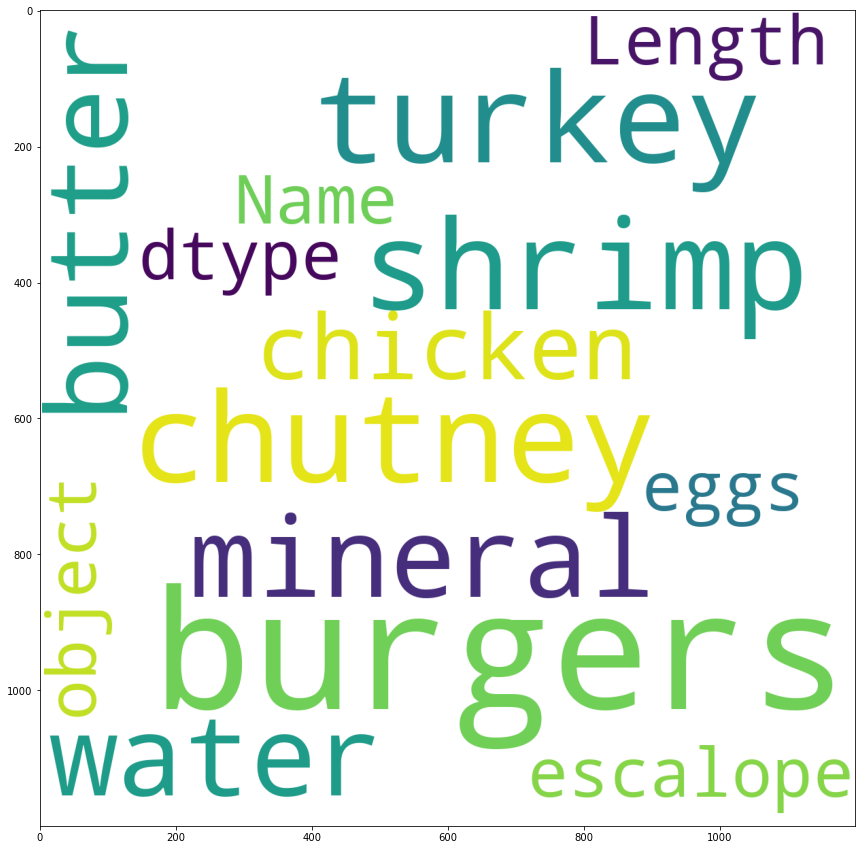

In [40]:
plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color='white', width=1200,
                      height=1200, max_words=120).generate(str(data[0]))
plt.imshow(wordcloud)

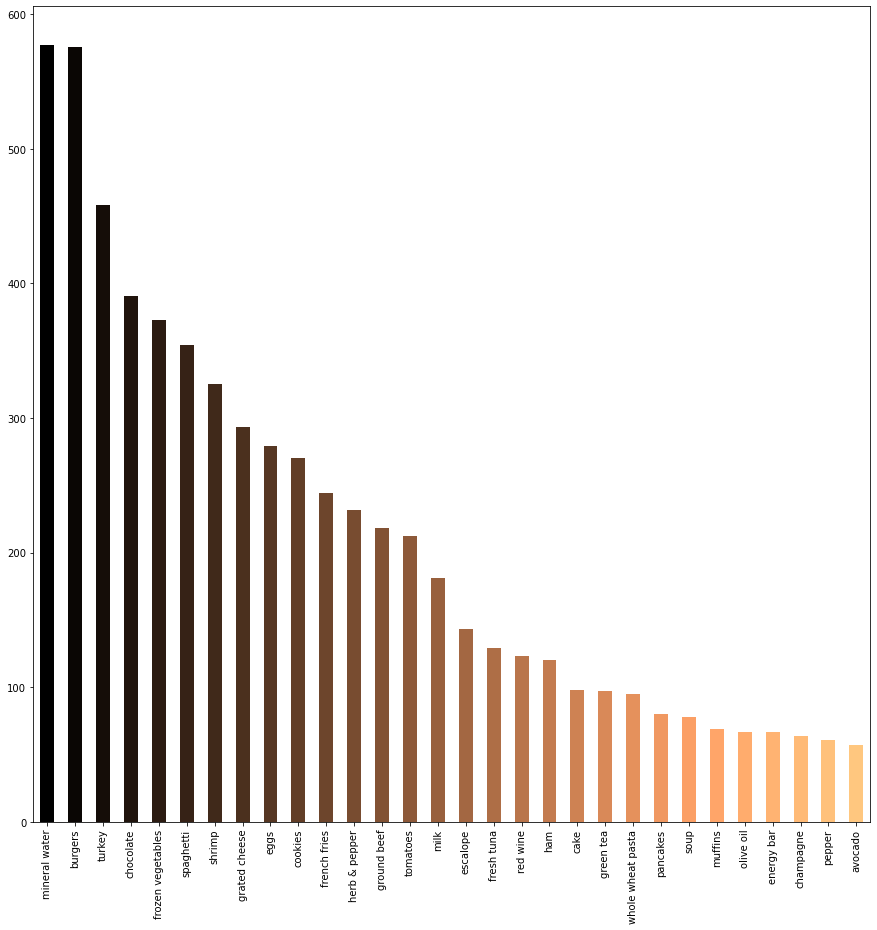

In [44]:
import numpy as np

data[0].value_counts().head(30).plot.bar(color=plt.cm.copper(np.linspace(0, 1, 30)))